Reference - https://www.cloudzilla.ai/dev-education/multivariate-time-series-using-auto-arima/#get-started

In [2]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\ashis\Github\lstm_backward\data\GRDC_6335125.csv")

In [3]:
df

date  snow_depth_water_equivalent_mean  \
0      1950-01-02                              0.55   
1      1950-01-03                              9.01   
2      1950-01-04                             12.35   
3      1950-01-05                             13.32   
4      1950-01-06                              8.24   
...           ...                               ...   
26796  2023-05-15                              0.00   
26797  2023-05-16                              0.00   
26798  2023-05-17                              0.00   
26799  2023-05-18                              0.00   
26800  2023-05-19                              0.00   

       surface_net_solar_radiation_mean  surface_net_thermal_radiation_mean  \
0                                 47.61                              -52.97   
1                                 13.39                               -1.11   
2                                 18.86                              -10.89   
3                                 15.15                               -6.05   
4                                 26.53                              -30.26   
...                                 ...                                 ...   
26796                            201.35                              -57.18   
26797                            131.00                              -41.94   
26798                            173.93                              -64.61   
26799                            177.50                              -60.94   
26800                            141.47                              -41.76   

       surface_pressure_mean  temperature_2m_mean  \
0                      95.59                -0.88   
1                      94.59                 0.74   
2                      94.34                 0.25   
3                      94.41                 2.40   
4                      94.61                 2.46   
...                      ...                  ...   
26796                  94.68                11.19   
26797                  94.93                 9.36   
26798                  95.51                 8.38   
26799                  95.47                 9.79   
26800                  95.31                10.92   

       dewpoint_temperature_2m_mean  u_component_of_wind_10m_mean  \
0                            -11.17                          1.09   
1                              0.29                          1.65   
2                             -0.21                          1.37   
3                              1.74                          2.67   
4                              1.51                          2.24   
...                             ...                           ...   
26796                          8.78                          0.85   
26797                          6.85                         -0.02   
26798                          2.29                         -1.81   
26799                          3.33                         -2.68   
26800                          5.91                         -2.35   

       v_component_of_wind_10m_mean  volumetric_soil_water_layer_1_mean  ...  \
0                              1.44                                0.38  ...   
1                              0.81                                0.41  ...   
2                             -0.15                                0.41  ...   
3                              1.63                                0.42  ...   
4                              1.87                                0.42  ...   
...                             ...                                 ...  ...   
26796                         -0.60                                0.41  ...   
26797                         -2.79                                0.42  ...   
26798                         -2.58                                0.40  ...   
26799                         -1.28                                0.39  ...   
26800                         -1.48                      

In [4]:
df['date']=pd.to_datetime(df['date'])

In [5]:
import plotly.express as px

c:\Users\ashis\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [6]:
fig = px.line(df, x='date', y='total_precipitation_sum', title='Time Series')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [7]:
el_df=df.set_index('date')

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabe

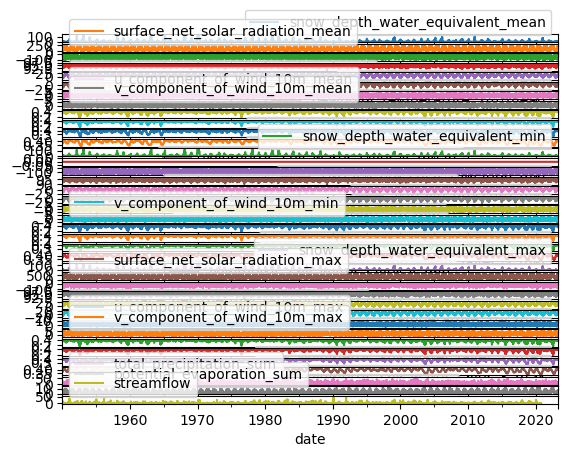

In [8]:
# Test for stationarity
el_df.plot(subplots=True)

In [15]:
columns_to_keep = ['temperature_2m_mean','surface_net_solar_radiation_mean',
                 'surface_net_thermal_radiation_mean','streamflow','total_precipitation_sum'] 
final_df = el_df[columns_to_keep]


In [16]:
final_df 

temperature_2m_mean  surface_net_solar_radiation_mean  \
date                                                                
1950-01-02                -0.88                             47.61   
1950-01-03                 0.74                             13.39   
1950-01-04                 0.25                             18.86   
1950-01-05                 2.40                             15.15   
1950-01-06                 2.46                             26.53   
...                         ...                               ...   
2023-05-15                11.19                            201.35   
2023-05-16                 9.36                            131.00   
2023-05-17                 8.38                            173.93   
2023-05-18                 9.79                            177.50   
2023-05-19                10.92                            141.47   

            surface_net_thermal_radiation_mean  streamflow  \
date                                                         
1950-01-02                              -52.97        1.23   
1950-01-03                               -1.11        1.35   
1950-01-04                              -10.89        1.43   
1950-01-05                               -6.05        2.57   
1950-01-06                              -30.26        4.32   
...                                        ...         ...   
2023-05-15                              -57.18         NaN   
2023-05-16                              -41.94         NaN   
2023-05-17                              -64.61         NaN   
2023-05-18                              -60.94         NaN   
2023-05-19                              -41.76         NaN   

            total_precipitation_sum  
date                                 
1950-01-02                     3.25  
1950-01-03                    15.77  
1950-01-04                     6.41  
1950-01-05                     6.30  
1950-01-06                     3.22  
...                             ...  
2023-05-15                     6.42  
2023-05-16                     5.11  
2023-05-17                     0.18  
2023-05-18                     0.00  
2023-05-19                     0.16  

[26801 rows x 5 columns]

In [17]:
training_period = ['1980-10-01','2019-09-30']
final_df = final_df.loc['1980-10-01':'2019-09-30']

In [18]:
final_df

temperature_2m_mean  surface_net_solar_radiation_mean  \
date                                                                
1980-10-01                11.77                             93.97   
1980-10-02                10.69                             30.42   
1980-10-03                 9.83                            137.73   
1980-10-04                10.83                            115.61   
1980-10-05                 9.39                             34.98   
...                         ...                               ...   
2019-09-26                13.43                             32.05   
2019-09-27                14.47                             64.74   
2019-09-28                13.22                            112.22   
2019-09-29                15.19                            150.14   
2019-09-30                12.87                             93.66   

            surface_net_thermal_radiation_mean  streamflow  \
date                                                         
1980-10-01                              -42.73        0.78   
1980-10-02                              -20.96        0.77   
1980-10-03                              -74.80        0.78   
1980-10-04                              -66.58        0.76   
1980-10-05                              -27.17        0.75   
...                                        ...         ...   
2019-09-26                              -16.57        0.53   
2019-09-27                              -31.71        0.47   
2019-09-28                              -48.72        0.61   
2019-09-29                              -66.77        0.50   
2019-09-30                              -45.08        0.62   

            total_precipitation_sum  
date                                 
1980-10-01                     0.21  
1980-10-02                     2.01  
1980-10-03                     0.01  
1980-10-04                     0.01  
1980-10-05                     0.50  
...                             ...  
2019-09-26                     3.09  
2019-09-27                     9.42  
2019-09-28                     3.32  
2019-09-29                     1.81  
2019-09-30                     3.88  

[14244 rows x 5 columns]

In [20]:
print ("\nMissing values :  ", final_df.isnull().any())


Missing values :   temperature_2m_mean                   False
surface_net_solar_radiation_mean      False
surface_net_thermal_radiation_mean    False
streamflow                            False
total_precipitation_sum               False
dtype: bool


In [21]:
import pmdarima as pm

In [22]:
model = pm.auto_arima(final_df['total_precipitation_sum'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=89269.505, Time=6.98 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=89267.191, Time=0.22 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=87653.445, Time=6.94 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=87843.248, Time=6.50 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=94375.211, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=87651.628, Time=0.43 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=87653.444, Time=2.62 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=87655.450, Time=7.53 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=87643.027, Time=0.69 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=87644.921, Time=9.15 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=87644.921, Time=3.32 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=87646.931, Time=10.98 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=87625.730, Time=0.92 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=87627.597, Time=11.34 sec
 AR

In [23]:
train=final_df[(final_df.index.get_level_values(0) >= '1980-10-01') & (final_df.index.get_level_values(0) <= '2005-09-30')]

In [24]:
test=final_df[(final_df.index.get_level_values(0) > '2005-09-30')]

In [25]:
test

temperature_2m_mean  surface_net_solar_radiation_mean  \
date                                                                
2005-10-01                10.72                             28.97   
2005-10-02                 8.49                             58.33   
2005-10-03                 7.96                             16.24   
2005-10-04                11.34                             33.11   
2005-10-05                12.53                             60.92   
...                         ...                               ...   
2019-09-26                13.43                             32.05   
2019-09-27                14.47                             64.74   
2019-09-28                13.22                            112.22   
2019-09-29                15.19                            150.14   
2019-09-30                12.87                             93.66   

            surface_net_thermal_radiation_mean  streamflow  \
date                                                         
2005-10-01                               -7.84        0.67   
2005-10-02                              -29.72        1.32   
2005-10-03                               -6.66        1.09   
2005-10-04                               -6.26        1.12   
2005-10-05                              -18.93        3.13   
...                                        ...         ...   
2019-09-26                              -16.57        0.53   
2019-09-27                              -31.71        0.47   
2019-09-28                              -48.72        0.61   
2019-09-29                              -66.77        0.50   
2019-09-30                              -45.08        0.62   

            total_precipitation_sum  
date                                 
2005-10-01                    13.89  
2005-10-02                     8.96  
2005-10-03                     4.25  
2005-10-04                    24.04  
2005-10-05                     3.79  
...                             ...  
2019-09-26                     3.09  
2019-09-27                     9.42  
2019-09-28                     3.32  
2019-09-29                     1.81  
2019-09-30                     3.88  

[5113 rows x 5 columns]

In [26]:
model.fit(train['total_precipitation_sum'])

ARIMA(order=(4, 0, 3), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [27]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [28]:
forecast

(2005-10-01    2.298301
 2005-10-02    3.271597
 2005-10-03    3.360470
 2005-10-04    3.335438
 Freq: D, dtype: float64,
 array([[-8.07852634, 12.67512874],
        [-7.65143506, 14.19462815],
        [-7.63147685, 14.35241781],
        [-7.68189915, 14.35277517]]))

In [29]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [30]:
forecast_df

Prediction
date                  
2005-10-01    2.298301
2005-10-02    3.271597
2005-10-03    3.360470
2005-10-04    3.335438
2005-10-05         NaN
...                ...
2019-09-26         NaN
2019-09-27         NaN
2019-09-28         NaN
2019-09-29         NaN
2019-09-30         NaN

[5113 rows x 1 columns]

In [31]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='date'>

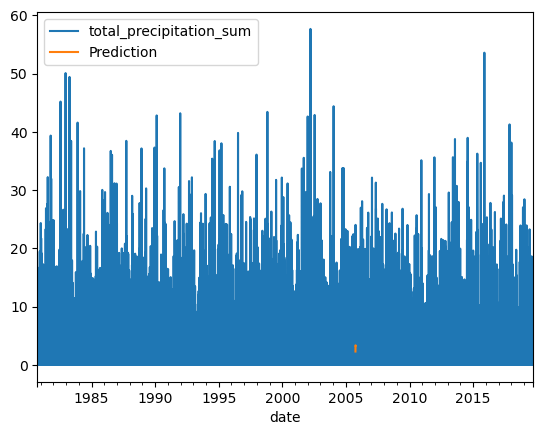

In [33]:
pd.concat([final_df['total_precipitation_sum'],forecast_df],axis=1).plot()

In [35]:
forecast1=model.predict(n_periods=8, return_conf_int=True)
forecast_range=pd.date_range(start='2005-09-30', periods=8,freq='D')

In [36]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

In [37]:
forecast1_df

Prediction
2005-09-30         NaN
2005-10-01    2.298301
2005-10-02    3.271597
2005-10-03    3.360470
2005-10-04    3.335438
2005-10-05    3.637079
2005-10-06    3.606167
2005-10-07    3.486299

In [39]:
final_df['total_precipitation_sum'].loc['2005-09-30':'2005-10-07']

date
2005-09-30     0.03
2005-10-01    13.89
2005-10-02     8.96
2005-10-03     4.25
2005-10-04    24.04
2005-10-05     3.79
2005-10-06     0.14
2005-10-07     0.11
Name: total_precipitation_sum, dtype: float64

In [44]:
df1 = pd.concat([final_df['total_precipitation_sum'].loc['2005-09-30':'2005-10-07'],forecast_df],axis=1)

<AxesSubplot:xlabel='date'>

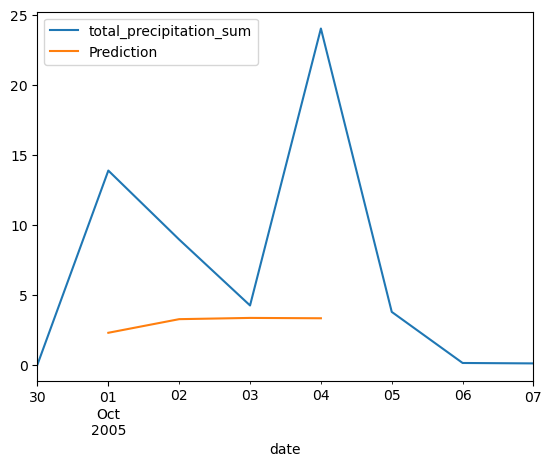

In [46]:
df1.loc['2005-09-30':'2005-10-07'].plot()

In [48]:
exog = final_df.drop(columns=['total_precipitation_sum'])
exog

temperature_2m_mean  surface_net_solar_radiation_mean  \
date                                                                
1980-10-01                11.77                             93.97   
1980-10-02                10.69                             30.42   
1980-10-03                 9.83                            137.73   
1980-10-04                10.83                            115.61   
1980-10-05                 9.39                             34.98   
...                         ...                               ...   
2019-09-26                13.43                             32.05   
2019-09-27                14.47                             64.74   
2019-09-28                13.22                            112.22   
2019-09-29                15.19                            150.14   
2019-09-30                12.87                             93.66   

            surface_net_thermal_radiation_mean  streamflow  
date                                                        
1980-10-01                              -42.73        0.78  
1980-10-02                              -20.96        0.77  
1980-10-03                              -74.80        0.78  
1980-10-04                              -66.58        0.76  
1980-10-05                              -27.17        0.75  
...                                        ...         ...  
2019-09-26                              -16.57        0.53  
2019-09-27                              -31.71        0.47  
2019-09-28                              -48.72        0.61  
2019-09-29                              -66.77        0.50  
2019-09-30                              -45.08        0.62  

[14244 rows x 4 columns]

In [50]:
# Fit an ARIMAX model
model = pm.ARIMA(order=(4, 0, 3), seasonal_order=(0, 0, 0, 0))
model.fit(final_df['total_precipitation_sum'], X=exog)

c:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\ashis\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\ashis\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(order=(4, 0, 3))